<a href="https://colab.research.google.com/github/priyanshu-rj/Machine_Learning-Model-for-Image-Classification/blob/main/Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 127MB/s]
100% 1.06G/1.06G [00:08<00:00, 133MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()



In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization



In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size =32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size =32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3))),
BatchNormalization(),
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')),

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu')),
BatchNormalization(),
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')),

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu')),
BatchNormalization(),
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')),

model.add(Flatten())
Dense(128, activation='relu'),
BatchNormalization(),
Dense(64, activation='relu'),
BatchNormalization(),
Dense(1, activation='sigmoid')

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 92ms/step - loss: 0.7124 - accuracy: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.0000e+00
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.6822 - accuracy: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.0000e+00
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.6801 - accuracy: 5.0000e-05 - val_loss: 0.6756 - val_accuracy: 0.0000e+00
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.6826 - accuracy: 0.0000e+00 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.6808 - accuracy: 0.0000e+00 - val_loss: 0.6729 - val_accuracy: 0.0000e+00
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.6758 - accuracy: 0.0000e+00 - val_loss: 0.6704 - val_accuracy: 0.0000e+00
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.6732 - acc

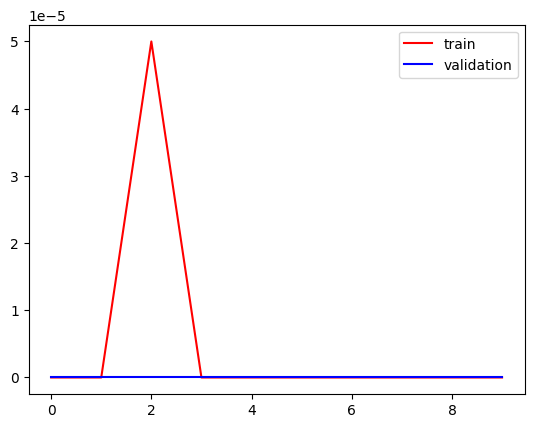

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

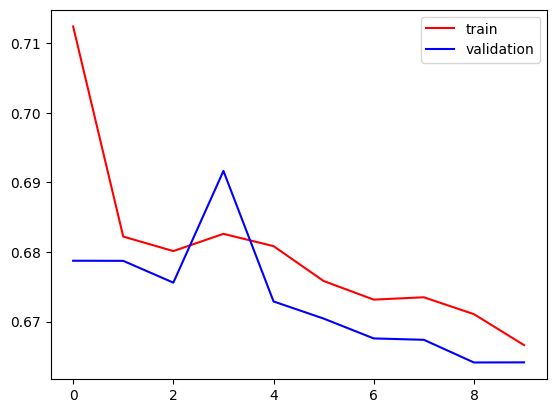

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [37]:
test_img = cv2.imread('/content/dog.jpg')

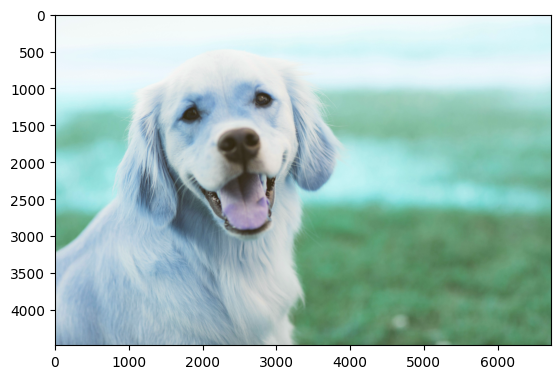

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(4480, 6720, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_input = test_img.reshape(1,256,256,3)

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[ 0.      ,  0.      ,  0.      , ..., 10.943703, 14.102965,
        15.918704]], dtype=float32)

In [43]:
test_img1 = cv2.imread('/content/cat.jpg')

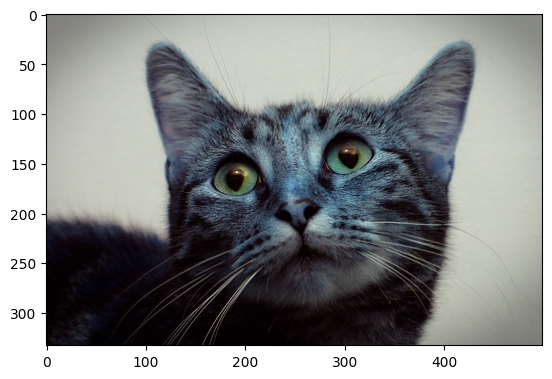

In [44]:
plt.imshow(test_img1)

In [45]:
test_img1.shape

(333, 499, 3)

In [46]:
test_img1 = cv2.resize(test_img1,(256,256))


In [47]:
test_input1 = test_img1.reshape(1,256,256,3)

In [48]:
model.predict(test_input1)

1/1 [==============================] - 0s 32ms/step


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)